In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import matplotlib.pyplot as plt # this is used for the plot the graph 
import os
import seaborn as sns # used for plot interactive graph.
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn import metrics
from sklearn.svm import SVC  
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
import sklearn.metrics.cluster as smc
from sklearn.model_selection import KFold
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.cluster import KMeans

from matplotlib import pyplot
import itertools

%matplotlib inline

import random 
  
random.seed(42) 

In [2]:
# Helper function that allows you to draw nicely formatted confusion matrices
def draw_confusion_matrix(y, yhat, classes):
    '''
        Draws a confusion matrix for the given target and predictions
        Adapted from scikit-learn and discussion example.
    '''
    plt.cla()
    plt.clf()
    matrix = confusion_matrix(y, yhat)
    plt.imshow(matrix, interpolation='nearest', cmap=plt.cm.Blues)
    plt.title("Confusion Matrix")
    plt.colorbar()
    num_classes = len(classes)
    plt.xticks(np.arange(num_classes), classes, rotation=90)
    plt.yticks(np.arange(num_classes), classes)    
    fmt = 'd'
    thresh = matrix.max() / 2.
    for i, j in itertools.product(range(matrix.shape[0]), range(matrix.shape[1])):
        plt.text(j, i, format(matrix[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if matrix[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()
    plt.show()

In [3]:
from google.colab import drive
drive.mount('/content/gdrive/', force_remount=True)
! ls
cupid = pd.read_csv('/content/gdrive/My Drive/Colab Notebooks/Cupid_Data/profiles_processed_data.csv')


Mounted at /content/gdrive/
gdrive	sample_data


In [4]:
cupid.describe()

,body_type,drinks,drugs,height,income,orientation,sex,smokes,status,record,new_sign,new_religion,age
count,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000,23742.000000
mean,4.974813,2.839946,1.206891,68.196951,25011.899419,1.390574,1.411423,1.488164,1.176817,30361.794668,6.475444,4.167088,33.265100
std,2.300229,0.759806,0.428628,3.954892,105150.184304,0.961480,0.492102,1.104615,0.650879,17515.564321,3.377759,2.859354,10.337491
min,1.000000,1.000000,1.000000,3.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,18.000000
25%,3.000000,3.000000,1.000000,65.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,15103.750000,4.000000,2.000000,26.000000
50%,4.000000,3.000000,1.000000,68.000000,-1.000000,1.000000,1.000000,1.000000,1.000000,30694.500000,6.000000,3.000000,30.000000
75%,6.000000,3.000000,1.000000,71.000000,20000.000000,1.000000,2.000000,1.000000,1.000000,45371.500000,9.000000,6.000000,38.000000
max,12.000000,6.000000,3.000000,95.000000,1000000.000000,4.000000,2.000000,5.000000,5.000000,60550.000000,12.000000,9.000000,69.000000


In [5]:
cupid_df = cupid

#need sex versus drink, smoke, status
cupid_df1 = cupid[["drinks", "smokes", "status","drugs","body_type","status","new_religion","age", "height", "sex"]]
#need all
cupid_df3 = cupid[["body_type",	"drinks",	"drugs",	"height",	"orientation",	"sex",	"smokes",	"status",		"new_sign",	"new_religion",	"age"]]



In [6]:
label = "sex"
y = cupid_df1[label]
x = cupid_df1.drop(label, axis=1)
#print(y)
#print(x)

In [7]:
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

In [8]:
knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(train, target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=12, p=2,
                     weights='uniform')

In [9]:
knn_pred = knn.predict(test)
metrics.accuracy_score(target_test, knn_pred)

0.8389723431138565

In [10]:
acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train, target)
    knn_pred = knn.predict(test)
    accuracy = metrics.accuracy_score(target_test, knn_pred)
    acc.append(accuracy)
    print(accuracy)

0.7941878422013197
0.8107538958304086
0.8219851186297908
0.8302681454443352
0.8312508774392812
0.83363751228415
0.8370068791239647
0.8423417099536712
0.838691562543872
0.8403762459637794
0.8374280499789415
0.8389723431138565
0.8410781973887407
0.8414993682437175
0.8423417099536712
0.8414993682437175
0.8443071739435631
0.8430436613786326
0.8426224905236558
0.8429032710936403


Max accuracy of 0.8443071739435631 occurs at K = 16


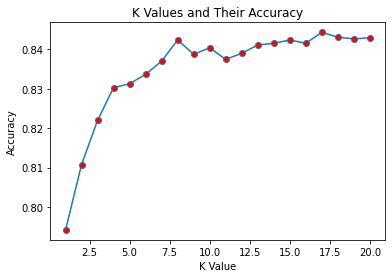

In [11]:
plt.plot(range(1, 21), acc, marker = "o", markerfacecolor = "red")
plt.title("K Values and Their Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print("Max accuracy of {} occurs at K = {}".format(max(acc), acc.index(max(acc))))

In [12]:
cv = cross_val_score(knn, train, target)
print(np.mean(cv))

0.8440339963634559


In [13]:
cv

array([0.84476534, 0.84416366, 0.84506619, 0.84115523, 0.84501956])

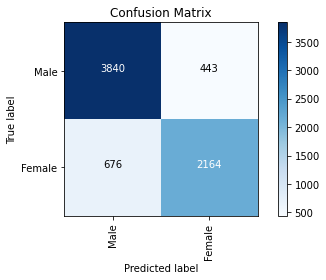

In [15]:
draw_confusion_matrix(target_test, knn_pred, ['Male', 'Female'])

0.08100519444054471
0.0856380738452899
0.0909729046749965
0.09013056296504282
0.09237680752491928
0.09041134353502737
0.08999017268005054
0.09111329495998877
0.09279797837989612
0.09111329495998877
0.09013056296504282
0.09279797837989612
0.0895690018250737
0.09293836866488839
0.092236417239927
0.09041134353502737
0.08928822125508915
0.0909729046749965
0.08970939211006598
0.09279797837989612
Max accuracy of 0.09293836866488839 occurs at K = 13


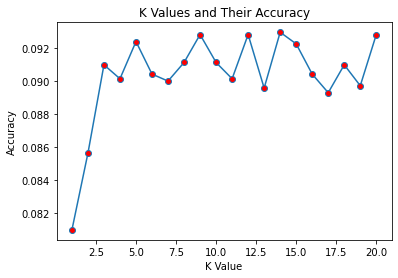

0.08622685197759264


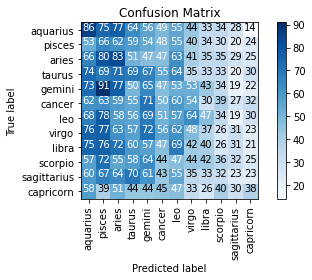

In [17]:
label = "new_sign"
y = cupid_df3[label]
x = cupid_df3.drop(label, axis=1)
train, test, target, target_test = train_test_split(x, y, test_size=0.3, random_state=0)

knn = KNeighborsClassifier(n_neighbors = 12)
knn.fit(train, target)

knn_pred = knn.predict(test)
metrics.accuracy_score(target_test, knn_pred)

acc = []

for i in range(1, 21):
    knn = KNeighborsClassifier(n_neighbors = i)
    knn.fit(train, target)
    knn_pred = knn.predict(test)
    accuracy = metrics.accuracy_score(target_test, knn_pred)
    acc.append(accuracy)
    print(accuracy)

plt.clf
plt.plot(range(1, 21), acc, marker = "o", markerfacecolor = "red")
plt.title("K Values and Their Accuracy")
plt.xlabel("K Value")
plt.ylabel("Accuracy")
print("Max accuracy of {} occurs at K = {}".format(max(acc), acc.index(max(acc))))
plt.show()
cv = cross_val_score(knn, train, target)
print(np.mean(cv))
cv

draw_confusion_matrix(target_test, knn_pred, ["aquarius", "pisces", "aries", "taurus", "gemini", "cancer", "leo", "virgo", "libra", "scorpio", "sagittarius",  "capricorn"])